# Visualizations in Python

This notebook will teach you how to explore data sets by using visualization tools in Python. It uses the Titanic data set that contains information on 891 of the passengers that was aboard the ill-fated ship "Titanic".

In [3]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the Titanic data set (dft: data frame titanic)
dft = pd.read_csv("../data/titanic.csv")

# If you're running this notebook on Google Colab, comment out the line above and uncomment the line below to load the data file from Github:
# dft = pd.read_csv("https://raw.githubusercontent.com/AIM-MADS-DATEXP/workshop-data-visualization/refs/heads/main/data/titanic.csv")

# We know there are missing values in the data set. This will cause problems later. For now fill them with the average value for the columns in question
dft['Age'].fillna(dft['Age'].mean())
dft

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Using plots to learn about central tendencies

The first thing we want to do when provided with a new data set is get a feel for what it contains. A good way to do this is to take a look at the distribution of the variables we're interested. This will tell us which of the measures for the central tendencies of our data are actually useful. Measures for central tendencies are the mean, mode and median. Related measures like variance and spread can also be useful.


### Examining our data by drawing histograms

Before we calculate these measures, we need to plot some graphs. These will help us determine which measures are actually useful for our data.

**Note**: every plot, even an exploratory one like this, should have the title, xlabel and ylabel set.

Here is an example of a histogram plot:


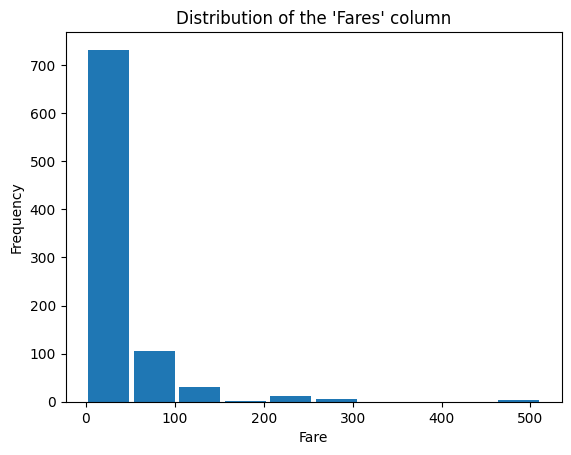

In [5]:
# Example: plot the "Fare" column in 10 bins
dft['Fare'].plot.hist(bins=10, title="Distribution of the 'Fares' column", xlabel="Fare", ylabel="Frequency", rwidth=0.9)
plt.show() # Always run this code after drawing a plot - it will get rid of some ugly Matplotlib output

Now do it yourself. Plot the "Age" column. Experiment with different values for the bins parameter. Start with 3, then do 5, 10, 15, 20 and 30. And, why not, try 50.
- Which values for the bins parameter are the most useful? 
- Can you see a story unfolding about the passengers of the Titanic as the value of the bins parameter increases?
- As you increase the value of the bins parameter, something interesting happens between the ages of 20 and 30. Is this interesting phenomenon actually meaningful? Why (not)? 

In [ ]:
# Your code goes here.

### Examining data sets using box plots

The histogram will have told you the age distribution of the Titanic's passengers is skewed (why do you think that is?).

Another plot type that is often used to detect skew is the box plot.

Here is an example of a box plot for the "Fare" variable

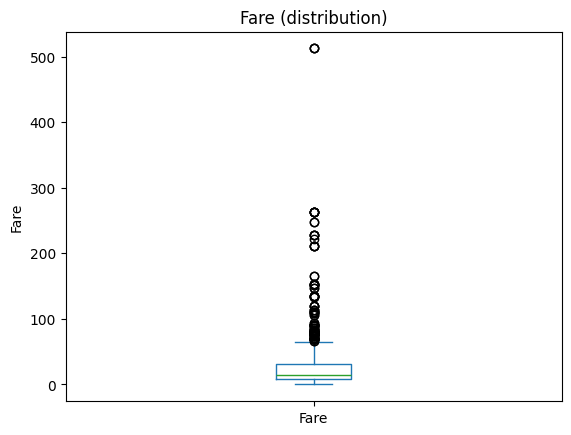

In [ ]:
dft['Fare'].plot.box(title = "Fare (distribution)", xlabel = "", ylabel="Fare")
plt.show()

The box shows the value of the "Fare" variable between de 25th percentile and the 75th percentile. The part of the box below the horizontal line inside the box contains the 25th percentile to the 50th percentile and the part of the box above the horizontal line contains the 50th to th 75th percentile. The line below the box shows where the 0th percentile starts and the line above the box shows where the 100th percentile stops. The circles show outliers.

The horizontal line inside the box shows the middle value in the distribution of values: the median.

This box plot tells us the distribution of fares is skewed: half of the passengers paid a comparatively low fare. A few passengers paid a lot. (Notice the histogram for the "Fare" variable also told us this).

Now do it yourself. Make a box plot for the "Age" column. How does this box plot compare to the box plot for the "Fare" column?

In [ ]:
# Your code goes here

### Calculating some numbers

Once we have a feel for the distribution of our data, we can calculate some numbers (mean, median, mode and standard deviation / variance).

Here is example code for the "Fare" variable:

In [ ]:
# The mean. How useful is this, given what you know about the distribution of the data?
dft['Fare'].mean() 


np.float64(32.204207968574636)

In [ ]:
# The median. How useful is this measure compared to the mean for this data?
dft['Fare'].median()

np.float64(14.4542)

In [ ]:
# The mode. Notice the output of this function is a data frame containing, in this case, one entry. Sometimes a distribution has multiple modes.
dft['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

In [ ]:
# Aside: the mode is an array because data sets with multiple modes exist. Here is a silly example:
dfsilly = pd.DataFrame({'Silly' : [0, 1, 2, 2, 2, 3, 4, 5, 5, 5, 6, 7, 8, 9]})
dfsilly['Silly'].mode()


0    2
1    5
Name: Silly, dtype: int64

In [ ]:
# As mode is an array, to get the first mode you simply do:
dft['Fare'].mode()[0]
# But notice this is only valid if there really is only one mode.

np.float64(8.05)

In [ ]:
# The standard deviation. What does this value tell us about the distribution of this variable (hint: look at the value of the mean)?
dft['Fare'].std()

np.float64(49.6934285971809)

Now do it yourself: calculate values for the "Age" variable. Given what you have learned about the distribution from the plots you made earlier, what do these values mean? And which of these measures for the central tendency are actually useful?

In [ ]:
# Your code goes here.


## Using boxplots to compare samples

Until now we have been using plots to tell us something about a single set of numbers. While this is helpful, we can do so much more with them. For example, we can use them to find out if there are differences between populations.

In this next part of the workshop, we are going to compare young passengers on the Titanic to old passengers.

### Multiple plots on the same plot

The plotting library we use, matplotlib, allows us to combine multiple plots on the same plot. Doing this is a bit involved, unfortunately, but once you get the hang of it it's not too bad.

For this example we're going to do something a bit sad: we are going to split up the passengers on the Titanic into those that survived and those that did not.

In [ ]:
# Note how we filter out those records where the "Survived" variable has a specific value
dfsurvived = dft[dft['Survived'] == 1] 
dfperished = dft[dft['Survived'] == 0]


Next, we're going to set up a plot object.

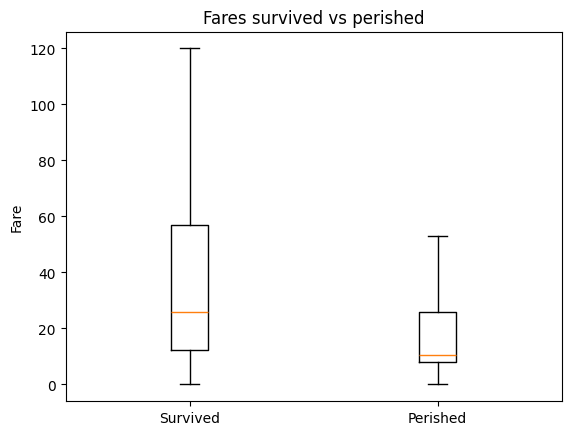

In [ ]:
# First we need to tell Matplotlib we want to create multiple plots on the same plot.
# ax is the variable that will let us draw subplots
fig, ax = plt.subplots()

# For each boxplot we need to set the position. 
# Position is an array of values, even if it only contains a single value.
# Outliers have been removed by setting showfliers to false.
# This makes the graph more readable (also, we already know there are outliers).
ax.boxplot(dfsurvived['Fare'], positions = [1], showfliers = False)
ax.boxplot(dfperished['Fare'], positions = [2], showfliers = False)
# Explicitly set the labels for the two boxplots.
ax.set_xticklabels(['Survived', 'Perished'])
# Set the label and the title.
ax.set_ylabel("Fare")
ax.set_title("Fares survived vs perished")

# Finally we must explicitly show our plot.
plt.show()


Oof. Likely to nobody's great surprise we find the very richest Titanic passengers had a much better chance of survival than the poorer passengers (we assume that passengers that could afford higher fares are richer than those that paid a cheaper fare).

### Try it yourself

Can you do the same thing, but comparing the ages of those that survived and those that died?

In [ ]:
# Your code goes here




At first glance, there seems to be no great difference, although you could perhaps say something about "women and children first"? (We'll revisit this question below)

## Scatterplots

So far we have examined our data using histograms and boxplots. There are, however, other plot types we could use to tell us about our data. The scatter plot is one such type. It can be used to plot two variabels against each other to see if there is a relationship between them.

Below is a scatterplot that shows passenger age vs the fare paid. Passengers are separated into two different classes: those that survived and those that did not.

**Note**: in the code below each data set that was plotted was given its own color. Also, the alpha (transparency) was set to make it easier to show overlapping values.



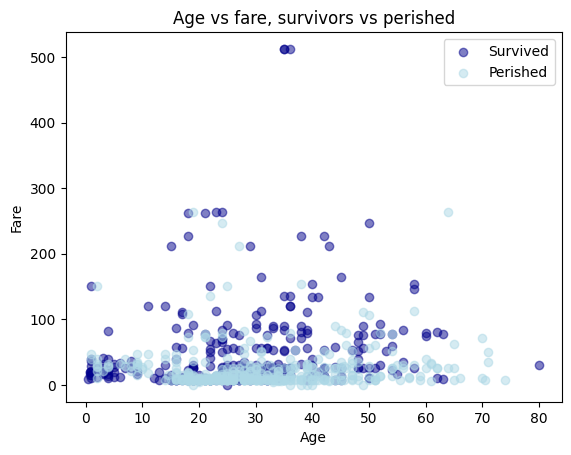

In [ ]:

fig, ax = plt.subplots()
plt.scatter(dfsurvived['Age'], dfsurvived['Fare'], color='darkblue', alpha = 0.5)
plt.scatter(dfperished['Age'], dfperished['Fare'], color='lightblue', alpha = 0.5)

ax.set_title("Age vs fare, survivors vs perished")
ax.set_ylabel("Fare")
ax.set_xlabel("Age")
ax.legend(["Survived", "Perished"])

plt.show()

Looking at the plot, we see some interesting things:
- It looks like higher fare passengers may have survived more often.
- There are some clear outliers in the data.

Perhaps it would be useful to remove the outliers and take a look at a scatterplot for the remaining passengers.

Filtering outliers works the same as filtering out passengers that survived. Use `>` and `<` to filter values that are greater or smaller than a given value.

To filter a data frame by multiple conditions you can to use the "loc" method.

Here is an example:

```python
dftclean.loc[(dftclean['Fare'] < 200) & (dftclean['Age'] < 60)]
```



In [ ]:
# Your code goes here


## Women and children first?

For the final assignment in this workshop, use what you learned above to find out whether women and children were more likely to survive the Titanic disaster.

You will have to get a bit creative with colors and transparency to make the effect visible. Also, while you might not actually be interested in the relationship between fare and age, plotting them against each other nevertheless is useful as it helps spread out the data points so they're easier to see.


In [ ]:
# Your code goes here